<a href="https://colab.research.google.com/github/hanGtz92/diabetes/blob/main/Tarea_Modelo_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
clientes = pd.read_csv("https://raw.githubusercontent.com/hanGtz92/diabetes/main/Diabetes.csv") 

#Variable a Predecir
y = clientes["Resultado"]
#Variables de Entrada
X = clientes.drop(columns = ["Resultado"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


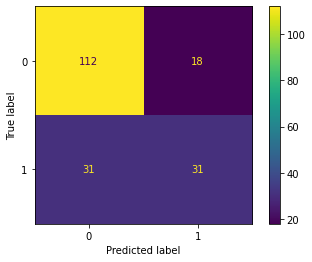

In [19]:
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Se utiliza el metodo train_test_split para separar aletoriamente el set de datos en 75% para entrenamiento y 25% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn import tree
ad = sklearn.tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3)
ad.fit(X_train, y_train)
y_pred_ad = ad.predict(X_test)
mc = metrics.confusion_matrix(y_test, y_pred_ad)
metrics.plot_confusion_matrix(ad,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


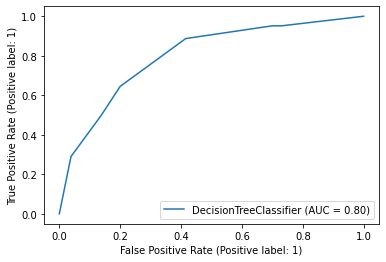

In [20]:
metrics.plot_roc_curve(ad, X_test, y_test)

In [21]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       130
           1       0.63      0.50      0.56        62

    accuracy                           0.74       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.74      0.74       192



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


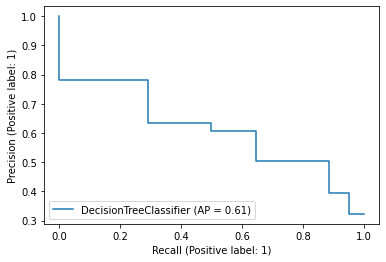

In [22]:
metrics.plot_precision_recall_curve(ad,X_test,y_test)

**Guardando el Modelo**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Text(558.0, 475.65000000000003, 'Glucosa <= 123.5\nentropy = 0.941\nsamples = 576\nvalue = [370, 206]\nclass = No'),
 Text(279.0, 339.75, 'Indice Masa Corporal <= 26.45\nentropy = 0.685\nsamples = 329\nvalue = [269, 60]\nclass = No'),
 Text(139.5, 203.85000000000002, 'Probabilidad de Heredarla <= 0.675\nentropy = 0.087\nsamples = 92\nvalue = [91, 1]\nclass = No'),
 Text(69.75, 67.94999999999999, 'entropy = 0.0\nsamples = 76\nvalue = [76, 0]\nclass = No'),
 Text(209.25, 67.94999999999999, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1]\nclass = No'),
 Text(418.5, 203.85000000000002, 'Edad <= 28.5\nentropy = 0.81\nsamples = 237\nvalue = [178, 59]\nclass = No'),
 Text(348.75, 67.94999999999999, 'entropy = 0.549\nsamples = 126\nvalue = [110, 16]\nclass = No'),
 Text(488.25, 67.94999999999999, 'entropy = 0.963\nsamples = 111\nvalue = [68, 43]\nclass = No'),
 Text(837.0, 339.75, 'Indice Masa Corporal <= 30.05\nentropy = 0.976\nsamples = 247\nvalue = [101, 146]\nclass = Si'),
 Text(697.5, 20

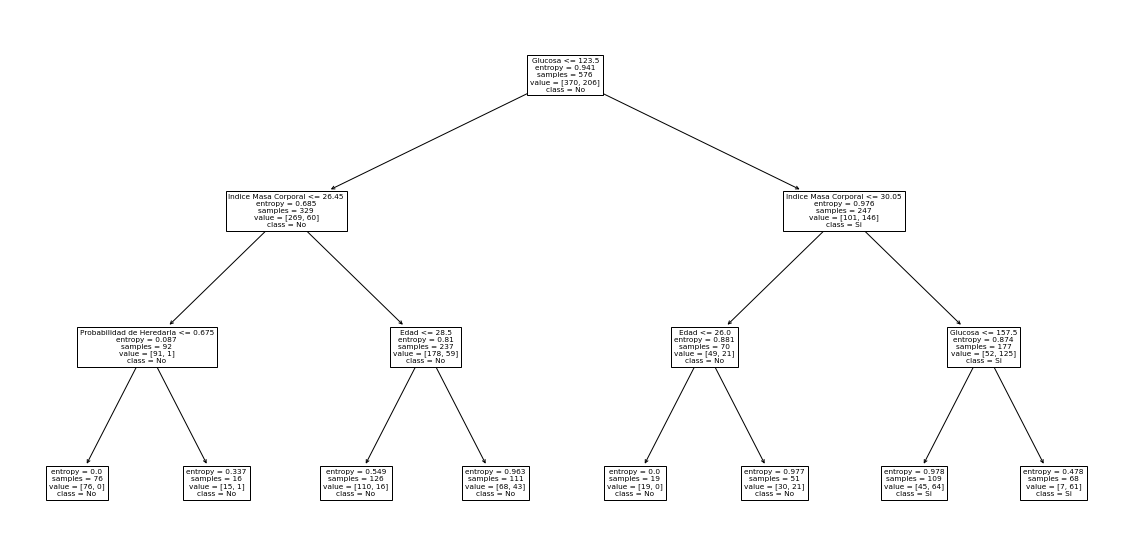

In [29]:
import pickle
import os
path = os.getcwd() + "/drive/MyDrive/Analítica Predictiva/Modelos/modelo_arbol_decision.pkl"
file = open(path, "wb")
pickle.dump(ad, file)
file = open(path, "rb")
modelo_ad = pickle.load(file)

variables = ["Embarazos", "Glucosa", "Presión", "Espesor de Piel", "Insulina", "Indice Masa Corporal", "Probabilidad de Heredarla", "Edad"]
diabetico = ["No","Si"]
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(modelo_ad, feature_names = variables, class_names = diabetico, ax = ax)